<a href="https://colab.research.google.com/github/KillerStrike17/Learn_With_Shubham/blob/master/Talks/Types%20of%20Regularization/Types_of_Regularization_Techniques_Dropouts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Feb  6 10:57:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    12W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Importing Libraries

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Activation, Flatten, Conv2D, GlobalAveragePooling2D,MaxPool2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from  tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

TensorFlow 2.x selected.


# Loading Dataset

In [3]:
#splitting the database
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

#Storing the training dataset details in variables
num_train,  img_rows, img_cols,img_channels, =  train_features.shape
print("No of training dataset:- ",num_train)
print("No of rows:- ",img_rows)
print("No of columns:- ",img_cols)
print("No of channels:- ",img_channels)

#Storing the testing dataset details in variables
num_test, _, _, _ =  test_features.shape

#Stroing the total class of dataset in num_classes variable
num_classes = len(np.unique(train_labels))
print("Total Classes:- ", num_classes)

No of training dataset:-  50000
No of rows:-  32
No of columns:-  32
No of channels:-  3
Total Classes:-  10


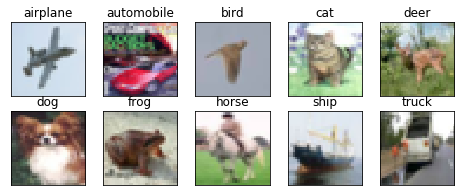

In [4]:
#class_names of the dataset
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
#loop to display a sample image of each channel
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
#converting the pixel in range 0-1
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Helper Functions

In [0]:

#function to plot graphs of accuracy and loss
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

# Model

In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation = 'relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (1, 1), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (1, 1), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(10, (1, 1), activation = 'relu'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        2080      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        1

In [0]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])

# Training and Results

In [9]:
history = model.fit(train_features, train_labels, batch_size=256, epochs=20, verbose=1,validation_data=(test_features, test_labels))


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 244us/sample - loss: 1.9554 - acc: 0.2894 - val_loss: 1.6310 - val_acc: 0.4122
Epoch 2/20
50000/50000 [==============================] - 8s 165us/sample - loss: 1.5211 - acc: 0.4432 - val_loss: 1.3643 - val_acc: 0.5020
Epoch 3/20
50000/50000 [==============================] - 8s 167us/sample - loss: 1.3151 - acc: 0.5239 - val_loss: 1.2096 - val_acc: 0.5696
Epoch 4/20
50000/50000 [==============================] - 8s 168us/sample - loss: 1.1849 - acc: 0.5771 - val_loss: 1.1030 - val_acc: 0.6031
Epoch 5/20
50000/50000 [==============================] - 8s 169us/sample - loss: 1.0877 - acc: 0.6148 - val_loss: 1.0363 - val_acc: 0.6303
Epoch 6/20
50000/50000 [==============================] - 8s 168us/sample - loss: 1.0096 - acc: 0.6418 - val_loss: 0.9609 - val_acc: 0.6564
Epoch 7/20
50000/50000 [==============================] - 8s 166us/sample - loss: 0.9452 - acc: 0.6654 - val_

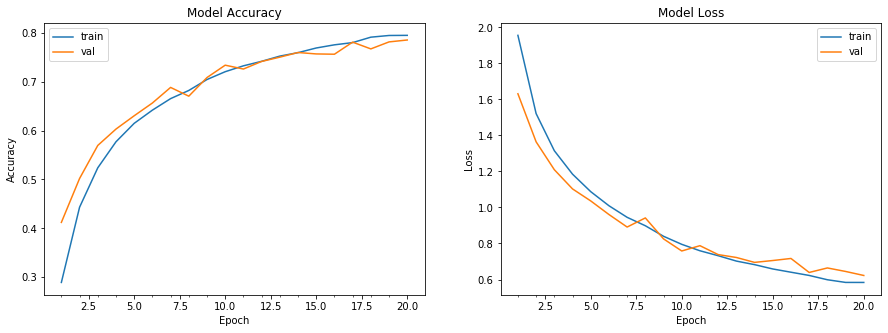

In [10]:
plot_model_history(history)